# HR Analytics 

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR

Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.


How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question we will write the code and try to understand the process step by step.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Get the number of rows and column
df.shape

(1470, 35)

In [4]:
# Get the column data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Get the count of the empty values of each column 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

The data set has no missing value

In [7]:
# get some statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
# Get a count of the number of employees that stayed and left the company
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Now, We can see that there are 1233 employees who are currently stayed with company and 237 employees left the company

<AxesSubplot:xlabel='Attrition', ylabel='count'>

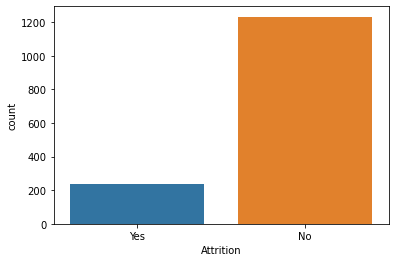

In [9]:
# Visualize of the number of employees that stayed and left the company
sns.countplot(df["Attrition"])

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

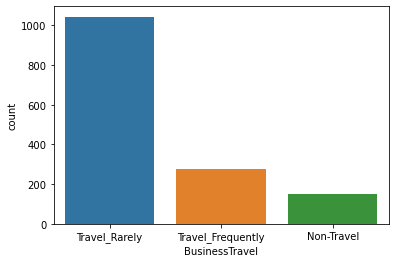

In [10]:
# count of employees based on buisness travel
sns.countplot(df["BusinessTravel"])

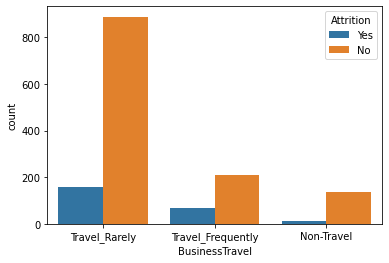

In [11]:
# each category of buisness travel where employee attrition is true
sns.countplot(x="BusinessTravel",data=df,hue="Attrition")
plt.show()

On above graph we can see  that proportion of attrition is higher where travel is frequent

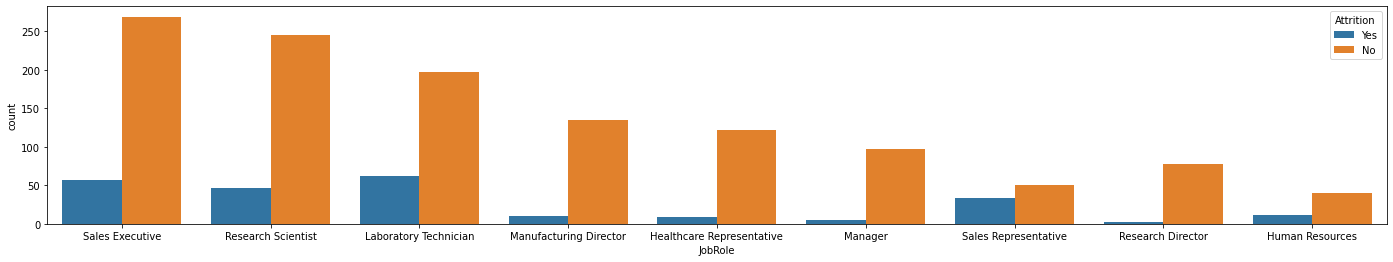

In [12]:
# visualize the attrition in each job role
plt.figure(figsize=(24,4))
sns.countplot(x="JobRole",data=df,hue="Attrition")
plt.show()

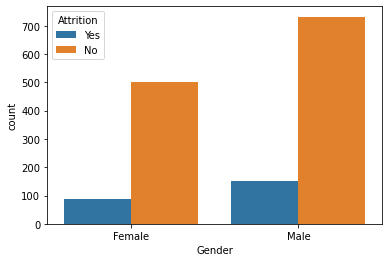

In [13]:
#checking the attrition ratio based on gender
sns.countplot(x="Gender",data=df,hue="Attrition")
plt.show()

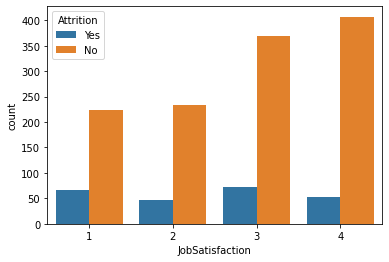

In [14]:
# The attrition ratio according to job satisfaction
sns.countplot(x="JobSatisfaction",data=df,hue="Attrition")
plt.show()

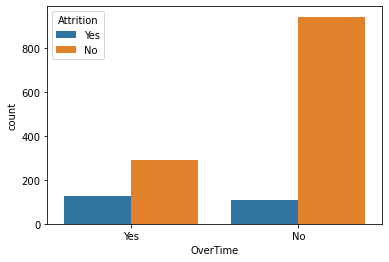

In [15]:
# check the proportion of attrition  on overtime
sns.countplot(x="OverTime",data=df,hue="Attrition")
plt.show()

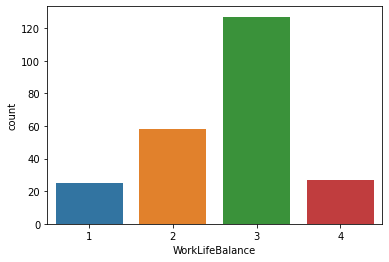

In [16]:
# Work life balance with attrition
sns.countplot(x="WorkLifeBalance",data=df.loc[df["Attrition"]=="Yes"])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='count'>

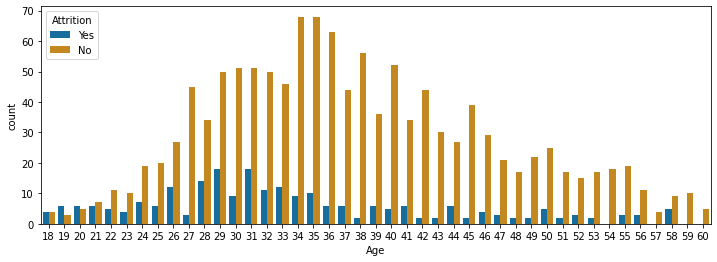

In [17]:
# Show the number of employees that left and stayed by age
plt.subplots(figsize=(12,4))
sns.countplot(x= "Age" , hue= "Attrition", data=df, palette= "colorblind")

Form above plot visualize, we can see that if the person is between 34 or 35 , a lot of those people of those age are currently employeed and we can see between the age of 29 and 31 is the majority of those people has left the company

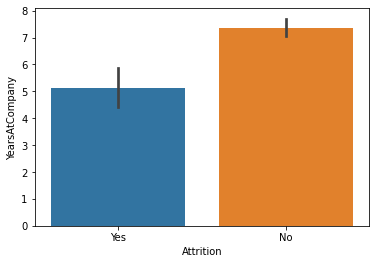

In [18]:
# average working years of the employee who left and stayed
sns.barplot(x="Attrition",y="YearsAtCompany",data=df)
plt.show()

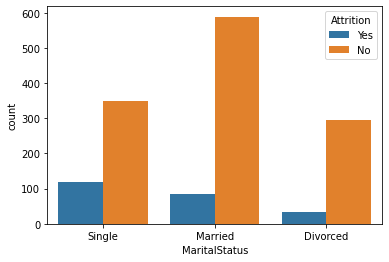

In [19]:
# Attrition ratio of Marital Status

sns.countplot(x="MaritalStatus",data=df,hue="Attrition")
plt.show()

In the above graph, we can see that Single ratio is hgher than other employee

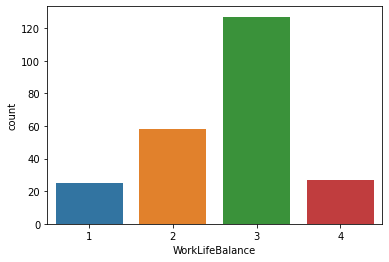

In [20]:
# work life balance with attrition
sns.countplot(x="WorkLifeBalance",data=df.loc[df["Attrition"]=="Yes"])
plt.show()

In [21]:
# Print all of the datatypes and their unique values
for column in df.columns:
    if df[column].dtype== object:
        print(str(column) + ' : '+ str(df[column].unique()) )
        print(df[column].value_counts())
        print('******************************************************************************************************')

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
******************************************************************************************************
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
******************************************************************************************************
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
******************************************************************************************************
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      

In [22]:
# Remove some useless column
df=df.drop(['Over18', "EmployeeNumber", "StandardHours", "EmployeeCount"], axis=1)

In [23]:
# Check the data again
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [24]:
# Get the correlation
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot:>

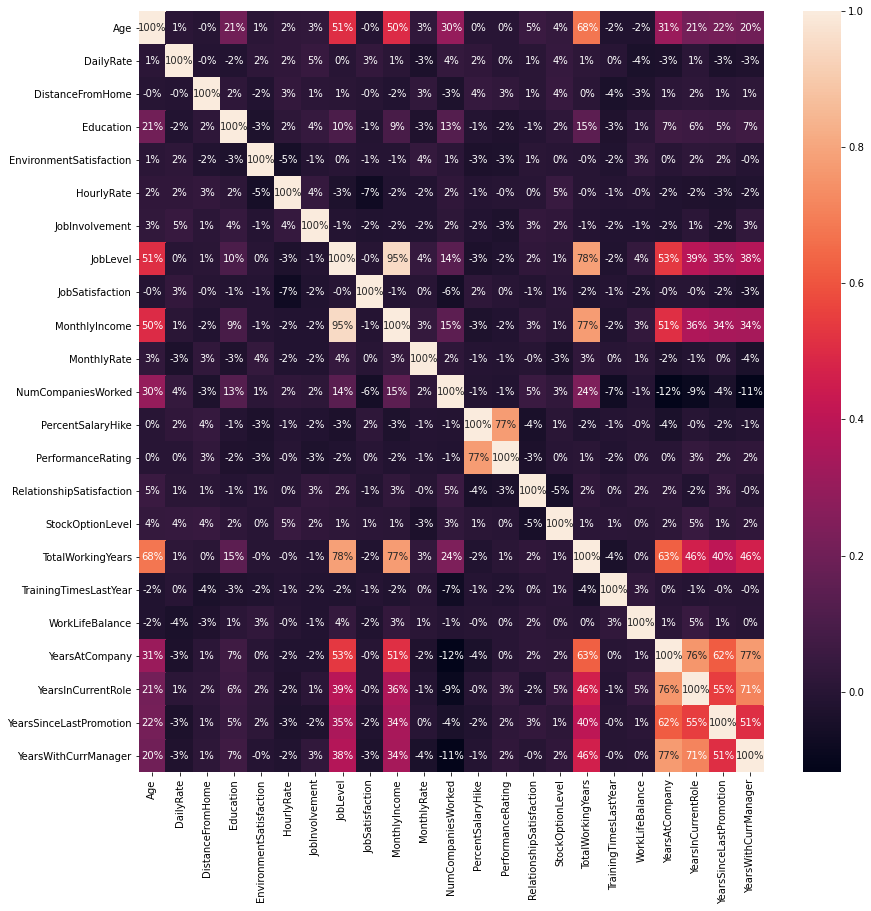

In [25]:
# Visualize the correlation
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(), annot=True, fmt=".0%")

1. Age column has 60% positive correlation with total working years.
2. Job Level has 78% positive correlation with Total working years, it means that as long as an employee working in an organisation the higher job level he/she got.
3. Monthly income has 95% postive correlation with  Job level, means the higher you job level , the higher monthly money you get

In [26]:
#Checking skewness
print(df.skew())
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  14


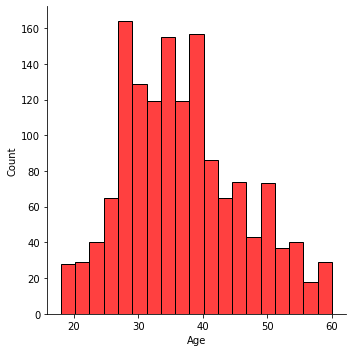

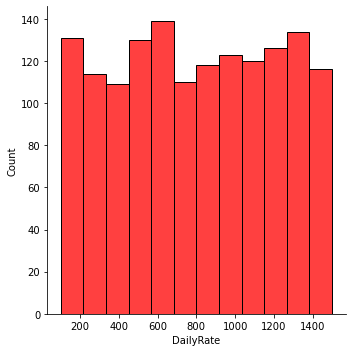

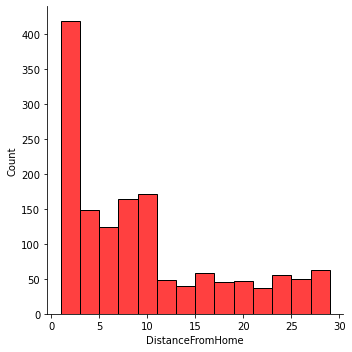

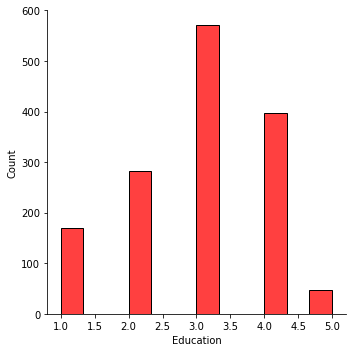

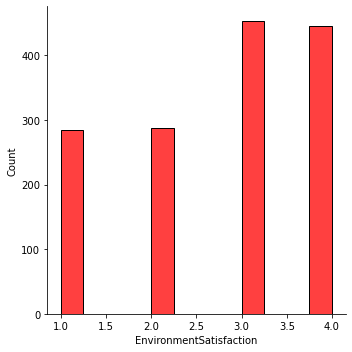

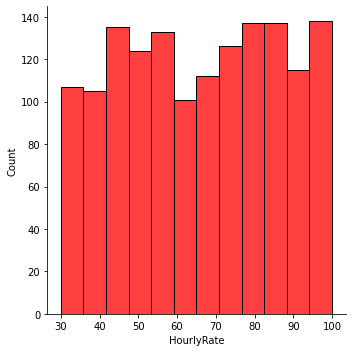

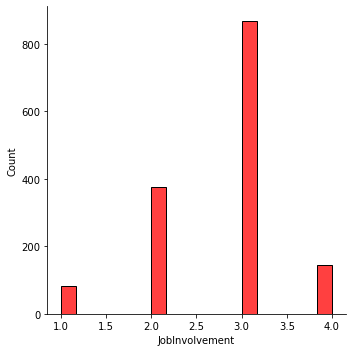

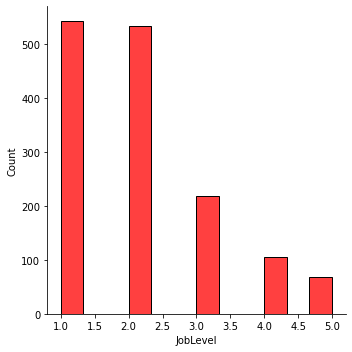

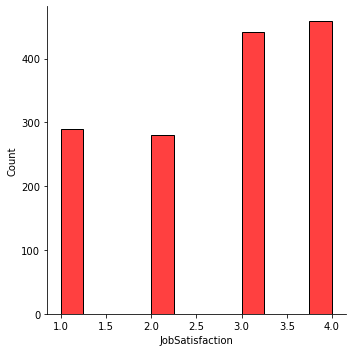

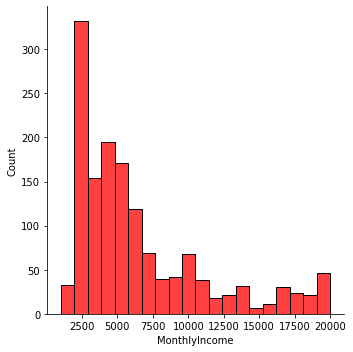

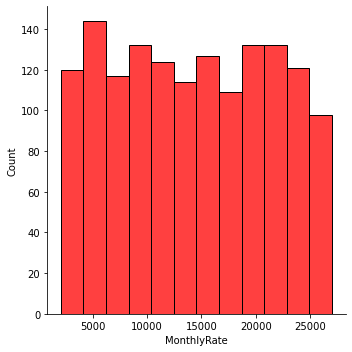

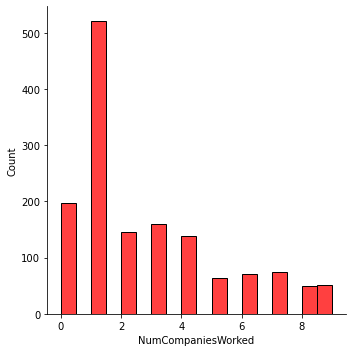

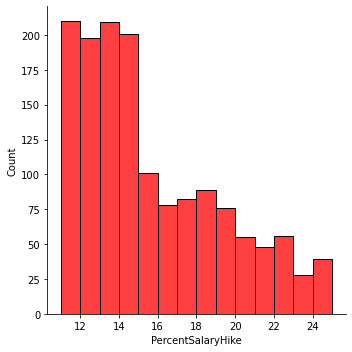

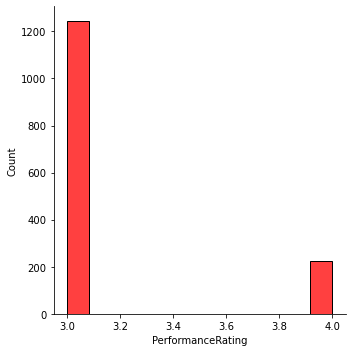

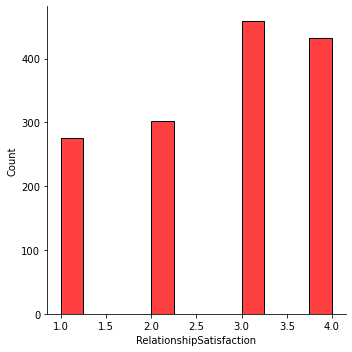

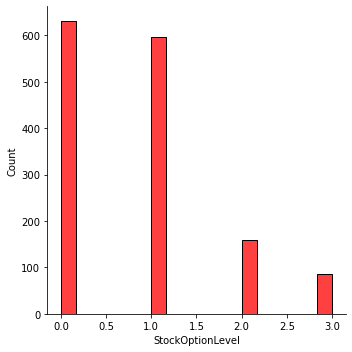

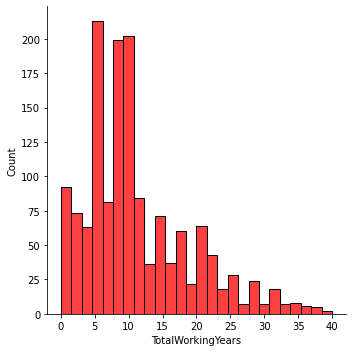

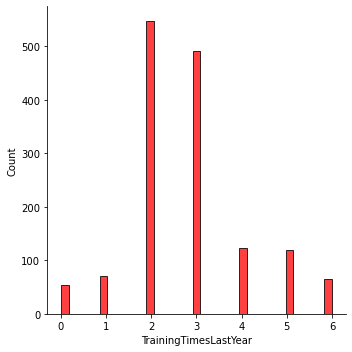

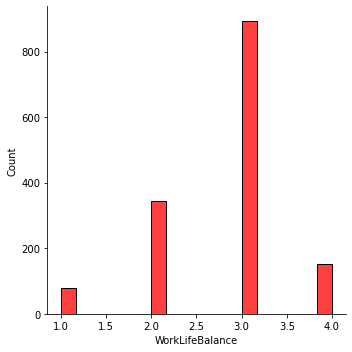

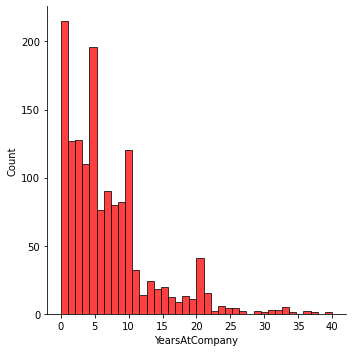

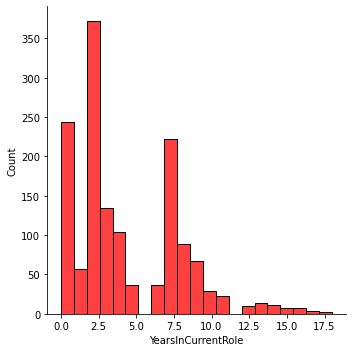

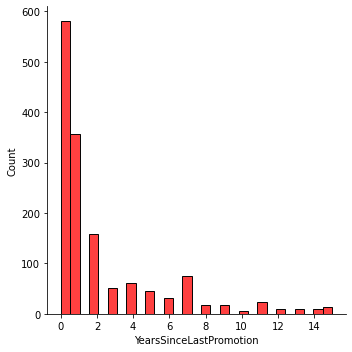

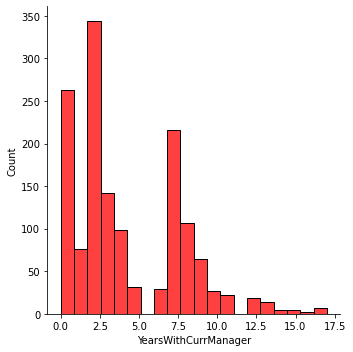

In [27]:
# To check the distribution of skewness
for col in df.describe().columns:
    sns.displot(df[col], color='r')
    plt.show()

In [28]:
#  treat the skewness 
import numpy as np
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.log1p(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.square(df[index])

In [29]:
# checking skewness again
print(df.skew())
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64
Total count of numeric features:  23
count of features which are significantly skewed:  3


In [30]:
# Transform the data
# Transform non-numerical into numerical column
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=LabelEncoder().fit_transform(df[column])

# Plotting outliers

<Figure size 720x360 with 0 Axes>

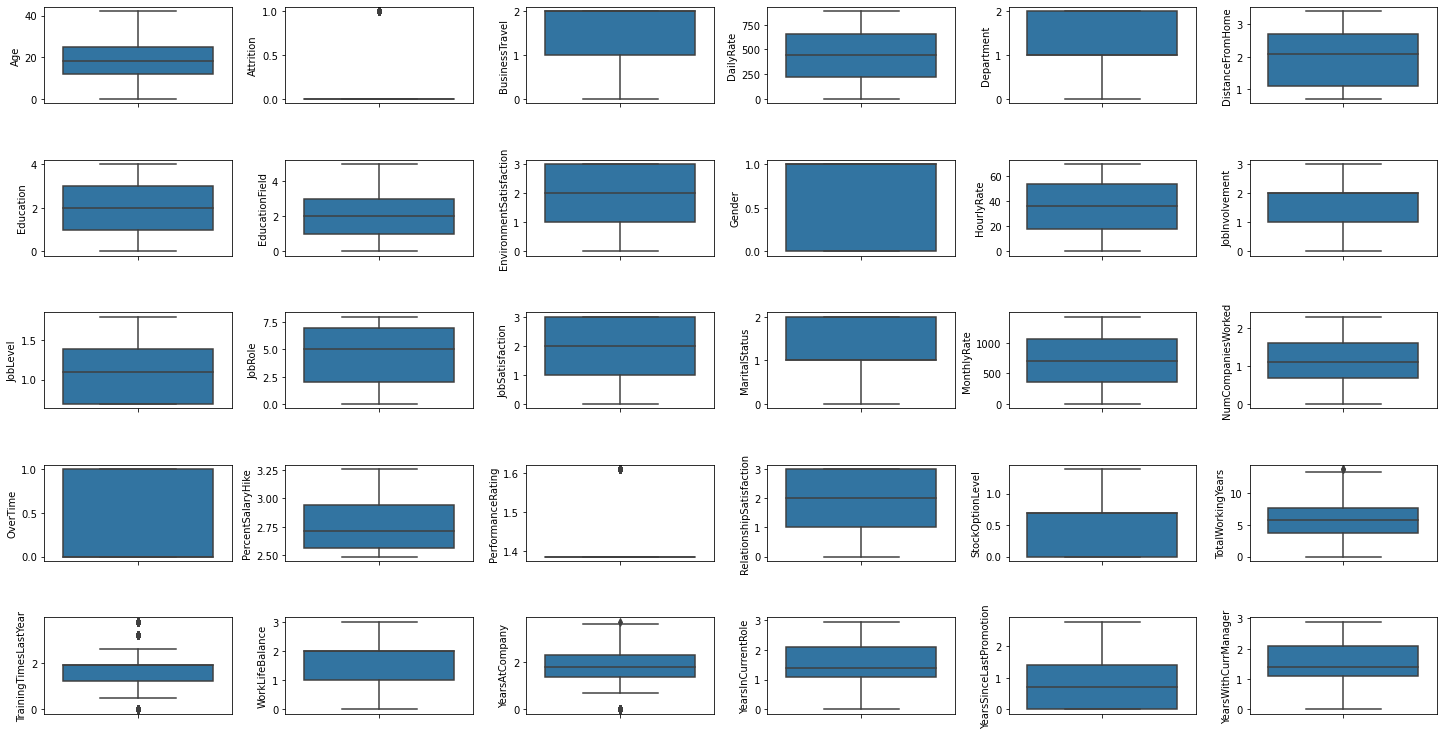

In [31]:
# Create Boxplots
plt.figure(figsize=(10,5))
fig, ax=plt.subplots(ncols=6,nrows=5, figsize=(20,10))
index=0
ax=ax.flatten()

for col, value in df.items():
    if col!='MonthlyIncome':
        sns.boxplot(y=col, data=df, ax=ax[index])
        index+=1
        plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

As we can see that , there are few outliers in dataset. So we will remove out liers from 'Attrition' column as it is our target variable

In [32]:
# Removing outliers
from scipy.stats import zscore
zs=np.abs(zscore(df))
zs

array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.29061127, 0.97334237,
        0.54799589],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.88267046, 0.11727147,
        0.90492352],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.73678265, 0.97334237,
        1.67504313],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.352871  , 0.97334237,
        0.04493464],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.71446221, 0.97334237,
        1.05105714],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.00951942, 0.11727147,
        0.311993  ]])

In [33]:
threshold=3
df1=df[(zs<3).all(axis=1)]
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,1,2,624,2,0.693147,1,1,1,0,...,1.386294,0,0.000000,4.827796,0.000000,0,1.945910,1.609438,0.000000,1.791759
1,31,0,1,113,1,2.197225,0,1,2,1,...,1.609438,3,0.693147,5.749902,1.921812,2,2.397895,2.079442,0.693147,2.079442
2,19,1,2,805,1,1.098612,1,4,3,1,...,1.386294,1,0.000000,4.324077,1.921812,2,0.000000,0.000000,0.000000,0.000000
3,15,0,1,820,1,1.386294,3,1,3,0,...,1.386294,2,0.000000,4.827796,1.921812,2,2.197225,2.079442,1.386294,0.000000
4,9,0,2,312,1,1.098612,0,3,0,1,...,1.386294,3,0.693147,3.786566,1.921812,2,1.098612,1.098612,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,0,1,494,1,3.178054,1,3,2,1,...,1.386294,2,0.693147,8.354249,1.921812,2,1.791759,1.098612,0.000000,1.386294
1466,21,0,2,327,1,1.945910,0,3,3,1,...,1.386294,0,0.693147,5.301898,3.210402,2,2.079442,2.079442,0.693147,2.079442
1467,9,0,2,39,1,1.609438,2,1,1,1,...,1.609438,1,0.693147,3.786566,0.000000,2,1.945910,1.098612,0.000000,1.386294
1468,31,0,1,579,2,1.098612,2,3,3,1,...,1.386294,3,0.000000,8.354249,1.921812,1,2.302585,1.945910,0.000000,2.197225


In [34]:
print(df1.shape)


(1470, 31)


In [36]:
# Create a new column
df1["Age_years"]=df1["Age"]

In [37]:
# Drop the age column
df1=df1.drop('Age', axis=1)

In [38]:
# Show the dataframe
df1.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_years
0,1,2,624,2,0.693147,1,1,1,0,64,...,0,0.000000,4.827796,0.000000,0,1.945910,1.609438,0.000000,1.791759,23
1,0,1,113,1,2.197225,0,1,2,1,31,...,3,0.693147,5.749902,1.921812,2,2.397895,2.079442,0.693147,2.079442,31
2,1,2,805,1,1.098612,1,4,3,1,62,...,1,0.000000,4.324077,1.921812,2,0.000000,0.000000,0.000000,0.000000,19
3,0,1,820,1,1.386294,3,1,3,0,26,...,2,0.000000,4.827796,1.921812,2,2.197225,2.079442,1.386294,0.000000,15
4,0,2,312,1,1.098612,0,3,0,1,10,...,3,0.693147,3.786566,1.921812,2,1.098612,1.098612,1.098612,1.098612,9


In [39]:
# Split the data
x=df1.iloc[:,1:df1.shape[1]].values
y= df1.iloc[:,0].values

In [40]:
# Split the data into 75% Training and 25% testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=0)

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [42]:
log.score(x_test, y_test)

0.8586956521739131

In [43]:
log.score(x_train,y_train)

0.868421052631579

In [44]:
# Show tghe confusion matrix and accuracy score for the model on the test data
# tn= to negative
# tp= to positive
# fn= False negative
# fp= False positive
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, log.predict(x_test))
tn=cm[0][0]
tp=cm[1][1]
fn=cm[1][0]
fp=cm[0][1]

print(cm)
print('Model Testing Accuracy={}'.format((tp+tn)/(tp+tn+fp+fn)))

[[305   5]
 [ 47  11]]
Model Testing Accuracy=0.8586956521739131


In [45]:
# Cross Validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(log, x,y, cv=5, scoring='accuracy')
print(score)
print("Mean:", score.mean())
print('Std:', score.std())

[0.8707483  0.86054422 0.86394558 0.87414966 0.86734694]
Mean: 0.8673469387755102
Std: 0.00481025021215339


# Gradient Boosting Classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [47]:
gbc.score(x_test, y_test)

0.875

In [48]:
gbc.score(x_train, y_train)

0.9664246823956443

In [49]:
# Show tghe confusion matrix and accuracy score for the model on the test data
# tn= to negative
# tp= to positive
# fn= False negative
# fp= False positive
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, gbc.predict(x_test))
tn=cm[0][0]
tp=cm[1][1]
fn=cm[1][0]
fp=cm[0][1]

print(cm)
print('Model Testing Accuracy={}'.format((tp+tn)/(tp+tn+fp+fn)))

[[303   7]
 [ 39  19]]
Model Testing Accuracy=0.875


In [50]:
# Cross Validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(gbc, x,y, cv=5, scoring='accuracy')
print(score)
print("Mean:", score.mean())
print('Std:', score.std())

[0.84693878 0.86054422 0.8707483  0.85034014 0.87414966]
Mean: 0.8605442176870748
Std: 0.010756046463157736


# Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
# Get the accuracy on the test dataset
rfc.score(x_test,y_test)

0.8641304347826086

In [53]:
# Get the accuracy on the training dataset
rfc.score(x_train,y_train)

1.0

In [54]:
# Show tghe confusion matrix and accuracy score for the model on the test data
# tn= to negative
# tp= to positive
# fn= False negative
# fp= False positive
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, rfc.predict(x_test))
tn=cm[0][0]
tp=cm[1][1]
fn=cm[1][0]
fp=cm[0][1]

print(cm)
print('Model Testing Accuracy={}'.format((tp+tn)/(tp+tn+fp+fn)))

[[308   2]
 [ 48  10]]
Model Testing Accuracy=0.8641304347826086


In [55]:
# Cross Validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(rfc, x,y, cv=5, scoring='accuracy')
print(score)
print("Mean:", score.mean())
print('Std:', score.std())

[0.86054422 0.86734694 0.86394558 0.85034014 0.86394558]
Mean: 0.8612244897959183
Std: 0.0058519219503691405


# KNeighborsClassifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [57]:
# Get the accuracy on the test dataset
knn.score(x_test,y_test)

0.8260869565217391

In [58]:
# Get the accuracy on the training dataset
knn.score(x_train,y_train)

0.8511796733212341

In [59]:
# Show tghe confusion matrix and accuracy score for the model on the test data
# tn= to negative
# tp= to positive
# fn= False negative
# fp= False positive
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, knn.predict(x_test))
tn=cm[0][0]
tp=cm[1][1]
fn=cm[1][0]
fp=cm[0][1]

print(cm)
print('Model Testing Accuracy={}'.format((tp+tn)/(tp+tn+fp+fn)))

[[302   8]
 [ 56   2]]
Model Testing Accuracy=0.8260869565217391


In [60]:
# Cross Validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(knn, x,y, cv=5, scoring='accuracy')
print(score)
print("Mean:", score.mean())
print('Std:', score.std())

[0.81632653 0.80612245 0.82653061 0.81972789 0.81972789]
Mean: 0.8176870748299321
Std: 0.006665278211654914


# Support vector machine model

In [61]:
from sklearn.svm import SVC
svc = SVC(random_state=42, probability=True)
svc.fit(x_train, y_train)

SVC(probability=True, random_state=42)

In [62]:
# Get the accuracy on the test dataset
svc.score(x_test,y_test)

0.842391304347826

In [63]:
# Get the accuracy on the training dataset
svc.score(x_train,y_train)

0.837568058076225

In [64]:
# Show tghe confusion matrix and accuracy score for the model on the test data
# tn= to negative
# tp= to positive
# fn= False negative
# fp= False positive
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, svc.predict(x_test))
tn=cm[0][0]
tp=cm[1][1]
fn=cm[1][0]
fp=cm[0][1]

print(cm)
print('Model Testing Accuracy={}'.format((tp+tn)/(tp+tn+fp+fn)))

[[310   0]
 [ 58   0]]
Model Testing Accuracy=0.842391304347826


In [65]:
# Cross Validation
from sklearn.model_selection import cross_val_score

score=cross_val_score(svc, x,y, cv=5, scoring='accuracy')
print(score)
print("Mean:", score.mean())
print('Std:', score.std())

[0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]
Mean: 0.8387755102040817
Std: 0.0016663195529137286


In [70]:
# Saving This Gradient Boosting Classifier
#from sklearn.externals import joblib
#import sklearn.external.joblib as extjoblib
import joblib

# Save the model as a pickle in a file
joblib.dump(gbc,'Hr_employee_Attrition_gbc.pkl')

['Hr_employee_Attrition_gbc.pkl']